# <center> **PROJECT. Предсказание погоды в Австралии.**

## <center> **`1.` Постановка задачи**

**Цель работы:**

В данной работе необходимо обучить модель машинного обучения, которая будет предсказывать дождь в Австралии.

### <center> **Организационная информация**

Проект будет состоять из шести частей:

**`1.` Постановка задачи**;

**`2.` Исследование данных**;

**`3.` Предобработка данных**;

**`4.` Разведывательный анализ данных (EDA)**;

**`5.` Отбор и преобразование признаков (Feature Engineering)**;

**`6.` Построение и сравнение моделей (Machine Learning)**.

## <center> **`2.` Исследование данных**

Импортируем необходимые библиотеки:

In [1]:
# Для работы с данными
import pandas as pd
import numpy as np
import category_encoders as ce

# Для построения графиков
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Для построения модели
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import model_selection
from sklearn import feature_selection
from sklearn import preprocessing
from sklearn import metrics
import xgboost
import catboost

Прочитаем данные:

In [2]:
# Загружаем DataFrame
weather_data = pd.read_csv('Прочие файлы/weatherAUS.csv')

# Создаём копию
weather_df = weather_data.copy()

In [ ]:
# Выведем первые пять строк
weather_df.head()

### <center> **Иформация о датасете**

Данные содержат 23 признака и 145 460 наблюдений. Из этих 23 признаков шесть — категориальные, в одном записана дата, а остальные являются непрерывными числовыми данными.

**Целевой переменной** является столбец `RainTomorrow`. Значение этой переменной мы и будем пытаться предсказать.

* `Date` — дата, в которую зафиксировано наблюдение;
* `Location` — местонахождение метеорологической станции;
* `MinTemp` — минимальная температура (℃);
* `MaxTemp` — максимальная температура (℃);
* `Rainfall` — количество осадков (дождь) за сутки (мм);
* `Evaporation` — количество испарений до 9 утра (мм);
* `Sunshine` — количество часов в сутках, когда светило солнце;
* `WindGustDir` — направление самого сильного порыва ветра за последние 24 часа;
* `WindGustSpeed` — скорость самого сильного порыва ветра за последние 24 часа;
* `WindDir9am` — направление ветра в 9 утра;
* `WindDir3pm` — направление ветра в 3 часа дня;
* `WindSpeed9am` — скорость ветра в 9 часов утра;
* `WindSpeed3pm` — скорость ветра в 3 часа дня;
* `Humidity9am` — влажность в 9 утра;
* `Humidity3pm` — влажность в 3 часа дня;
* `Pressure9am` — атмосферное давление в 9 утра;
* `Pressure3pm` — атмосферное давление в 3 часа дня;
* `Cloud9am` — часть неба, закрытая облаками, в 9 утра;
* `Cloud3pm` — часть неба, закрытая облаками, в 3 часа дня;
* `Temp9am` — температура в 9 утра;
* `Temp3pm` — температура в 3 часа дня;
* `RainToday` — наличие дождя в этот день;
* `RainTomorrow` — наличие дождя на следующий день.

Посмотрим на типизацию признаков:

In [47]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Проверим данные на наличие пропусков:

Суммарное количество пропусков в данных: 343248 

Sunshine         48.009762
Evaporation      43.166506
Cloud3pm         40.807095
Cloud9am         38.421559
Pressure9am      10.356799
Pressure3pm      10.331363
WindDir9am        7.263853
WindGustDir       7.098859
WindGustSpeed     7.055548
Humidity3pm       3.098446
WindDir3pm        2.906641
Temp3pm           2.481094
RainTomorrow      2.245978
Rainfall          2.241853
RainToday         2.241853
WindSpeed3pm      2.105046
Humidity9am       1.824557
Temp9am           1.214767
WindSpeed9am      1.214767
MinTemp           1.020899
MaxTemp           0.866905
dtype: float64


<AxesSubplot:>

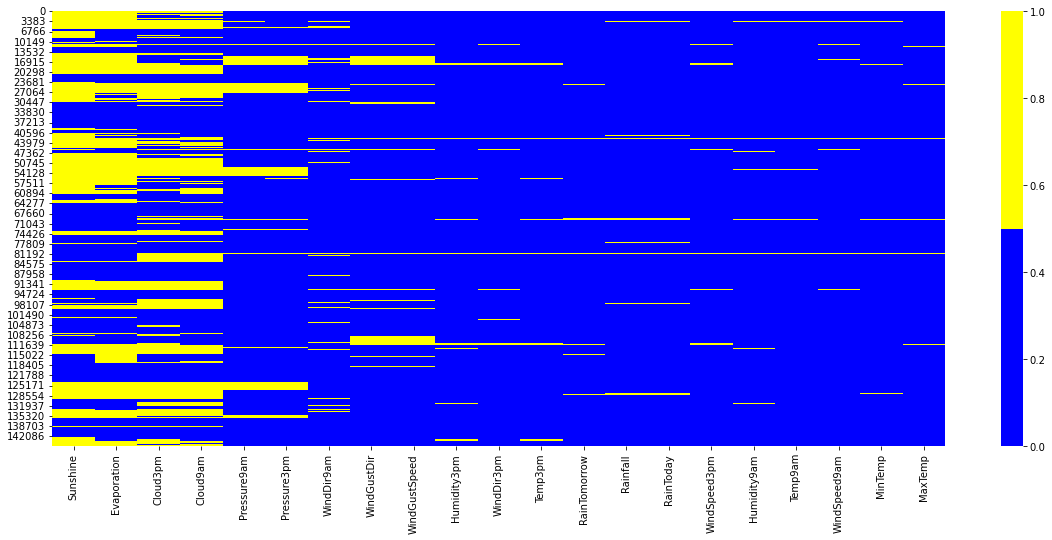

In [3]:
# Выводим суммарное количество пропусков
print('Суммарное количество пропусков в данных: {} \n'.format(weather_df.isnull().sum().sum()))



# Построим тепловую карту пропусков
# Создаём функцию отображения пропущенных значений на тепловой карте
def missing_values_heatmap(data):
    
    # Рассчитываем количество пропусков
    cols_null_persent = data.isnull().mean() * 100
    cols_with_null = cols_null_persent[cols_null_persent > 0].sort_values(ascending = False)
    print(cols_with_null)
    
    # Задаём параметры графика
    colors = ['blue', 'yellow']
    fig = plt.figure(figsize = (20, 8))
    cols = cols_with_null.index
    
    # Строим тепловую карту
    ax = sns.heatmap(
        data = data[cols].isnull(),
        cmap = sns.color_palette(colors)
    )
    
    return ax


# Применяем полученную функцию к нашему датасету
missing_values_heatmap(weather_df)

**Вывод:**

Практически все признаки содержат пропуски, причём доля пропусков некоторых превышает 40%. Также в данных присутствуют категориальные признаки, которые в дальнейшем необходимо будет обработать.

## <center> **`3.` Предобработка данных** 

#### $3.1$

Удалим признаки, доля пропусков которых превышает 40%. 

Пропуски остальных признаков заполняем `средним` значением, `медианой` и `модой`.

In [4]:
# Создаём функцию для удаления столбцов с суммарным количеством пропусков > 40%
def delete_missing_values(data):
    
    # Выбираем столбцы с долей пропусков больше 40% и удаляем их
    for column in data:
        if data[column].isnull().sum() / len(data) * 100 >= 40:
            data = data.drop(column, axis = 1)
            
    return data


# Применяем полученную функцию к нашему датасету
weather_df = delete_missing_values(data = weather_df)



# Создаём списки признаков для заполнения средним, медианным значением и модой
mean_list = ['Cloud9am', 'WindGustSpeed', 'Temp3pm', 'WindSpeed3pm', 'Temp9am', 'WindSpeed9am', 'MinTemp', 'MaxTemp']
median_list = ['Pressure9am', 'Pressure3pm', 'Humidity3pm', 'Rainfall', 'Humidity9am']
mode_list = ['WindDir9am', 'WindGustDir', 'WindDir3pm', 'RainToday', 'RainTomorrow']


# Заполняем пропуски средним значением
for column in mean_list:
    weather_df[column] = weather_df[column].fillna(weather_df[column].mean())
    
# Заполняем пропуски медианным значением
for column in median_list:
    weather_df[column] = weather_df[column].fillna(weather_df[column].median())
    
# Заполняем пропуски модой
for column in mode_list:
    weather_df[column] = weather_df[column].fillna(weather_df[column].mode()[0])
    
    
# Выводим итоговое количество пропусков
print(f'Количество пропусков в данных после обработки: {weather_df.isnull().sum().sum()}')

Количество пропусков в данных после обработки: 0


## <center> **`4.` Разведывательный анализ данных (EDA)**

#### $4.1$

Построим распределение количества дождливых дней.

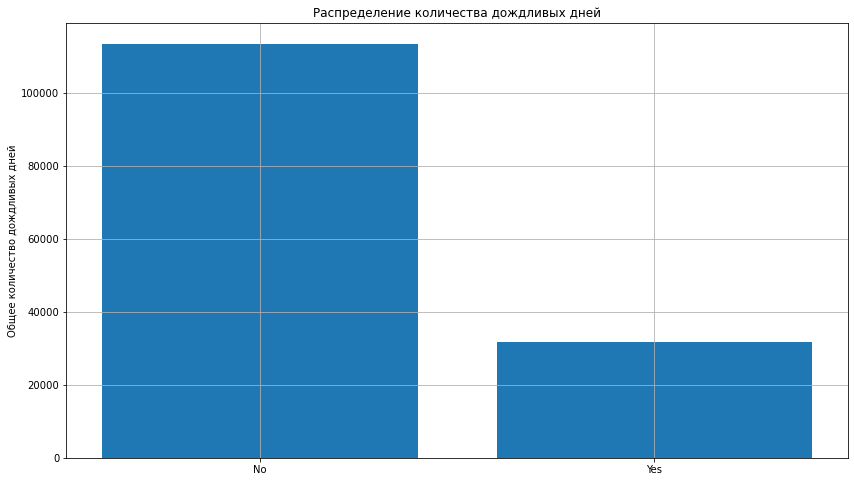

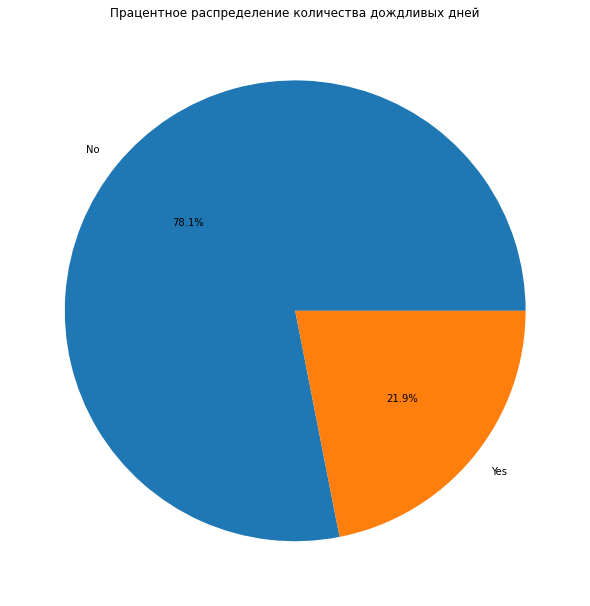

In [5]:
# Подсчитываем общее количество дней, когда был дождь и дней, когда его небыло
rain_distribution = weather_df.RainToday.value_counts()


# Строим столбчатую диаграмму
fig, ax = plt.subplots(figsize = (14, 8))                 # задаём размер

ax.bar(
    x = rain_distribution.index,                          # ось абсцисс
    height = rain_distribution                            # ось ординат
)

ax.set_ylabel('Общее количество дождливых дней')          # название оси ординат
ax.set_title('Распределение количества дождливых дней')   # название графика

plt.grid()                                                # отображаем сетку                                              
plt.show();                                               # выводим график




# Строик круговую диаграмму
fig = plt.figure(figsize = (8, 8))                        # задаём размер                      
axes = fig.add_axes([0, 0, 1, 1])                         # задаём координатную плоскость

axes.pie(
    rain_distribution,                                    # data         
    labels = rain_distribution.index,                     # наименования
    autopct = '%.1f%%'
)

axes.set_title('Працентное распределение количества дождливых дней'); # название графика

#### $4.2$

Построим распределение количества осадков (дождь) за сутки (мм) в зависимости от местонахождения метеорологической станции.

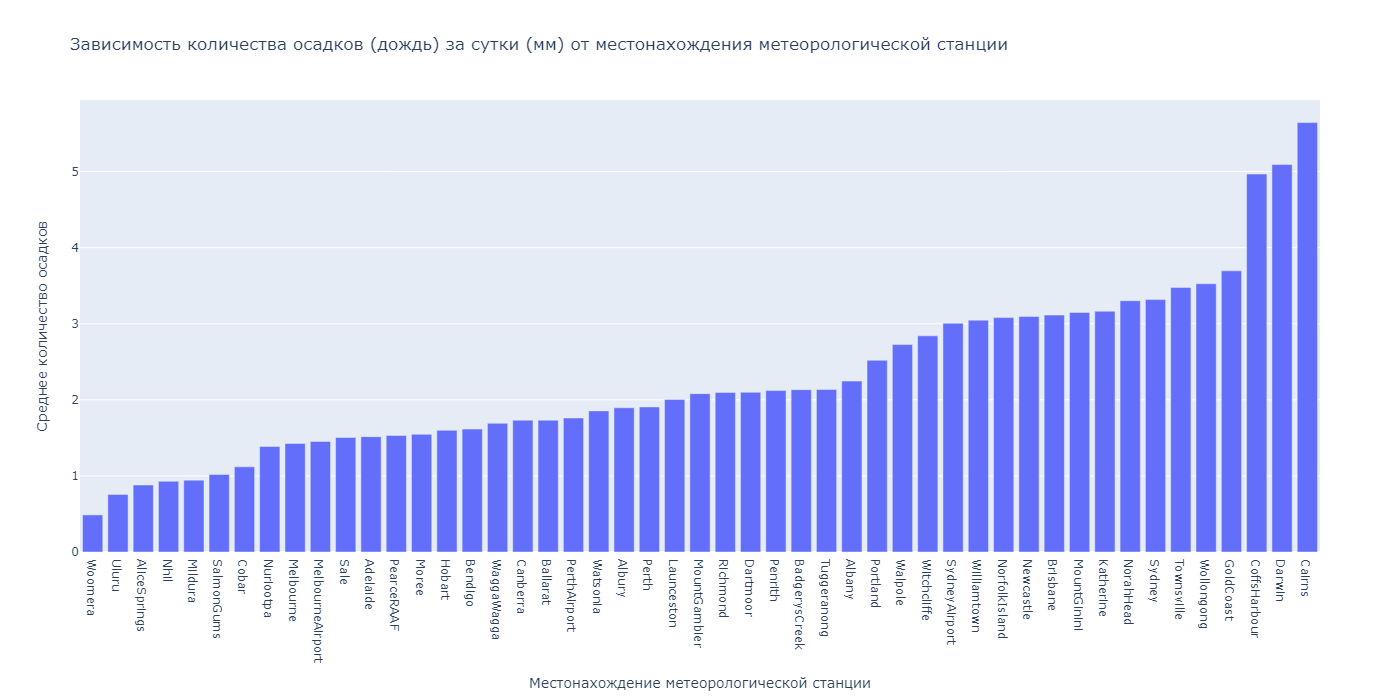

Максимальное количество осадков 5.644 наблюдается в регионе Cairns
Минимальное количество осадков 0.487 наблюдается в регионе Woomera


In [54]:
# Создаём DataFrame
rainfall_group = weather_df.groupby(
    by = 'Location',
    as_index = False
)[['Rainfall']].mean().sort_values(by = 'Rainfall')


# Строим диаграмму
fig = px.bar(
    data_frame = rainfall_group,
    x = 'Location',
    y = 'Rainfall',
    orientation = 'v',
    height = 700,
    width = 1400,
    
    labels = {
        'Location': 'Местонахождение метеорологической станции',
        'Rainfall': 'Среднее количество осадков'
    },
    
    title = 'Зависимость количества осадков (дождь) за сутки (мм) от местонахождения метеорологической станции'
)

# Выводим график
fig.show('png')


# Выводим регионы с максимальным и минимальным количеством осадков
print('Максимальное количество осадков {:.3f} наблюдается в регионе {}'.format(rainfall_group.Rainfall.round(3).max(), rainfall_group.iloc[-1]['Location']))
print('Минимальное количество осадков {:.3f} наблюдается в регионе {}'.format(rainfall_group.Rainfall.round(3).min(), rainfall_group.iloc[0]['Location']))

#### $4.3$

Построим распределение минимальной температуры в зависимости от местонахождения метеорологической станции.

## <center> **`5.` Отбор и преобразование признаков (Feature Engineering)**

#### $5.1$

Обработаем признаки `RainToday` и `RainTomorrow` таким образом, чтобы вместо $yes$ было значение $1$, а вместо $no$ — значение $0$.

In [56]:
# Создаём lambda-функцию для замены строк на числа
row_bin = lambda row: 1 if row == 'Yes' else 0

# Применяем полученную функцию к признакам RainToday и RainTomorrow
weather_df['RainToday'] = weather_df['RainToday'].apply(row_bin)
weather_df['RainTomorrow'] = weather_df['RainTomorrow'].apply(row_bin)

In [57]:
# Вычислим среднее арифметическое для преобразованных признаков RainToday и RainTomorrow
print('Среднее арифметическое для признака "RainToday": {:.2f}'.format(weather_df.RainToday.mean()))
print('Среднее арифметическое для признака "RainTomorrow: {:.2f}'.format(weather_df.RainTomorrow.mean()))

Среднее арифметическое для признака "RainToday": 0.22
Среднее арифметическое для признака "RainTomorrow: 0.22


#### $5.2$

Теперь из признака `Date` выделим два новых: `Month` (номер месяца) и `Year` (год).

In [58]:
# Преобразовываем признак 'Date' в тип datetime64
weather_df.Date = pd.to_datetime(weather_df.Date)

# Создаём признаки 'Month' и 'Year'
weather_df['Month'] = weather_df.Date.dt.month
weather_df['Year'] = weather_df.Date.dt.year

* Построим зависимость количества дождливых дней от месяца.

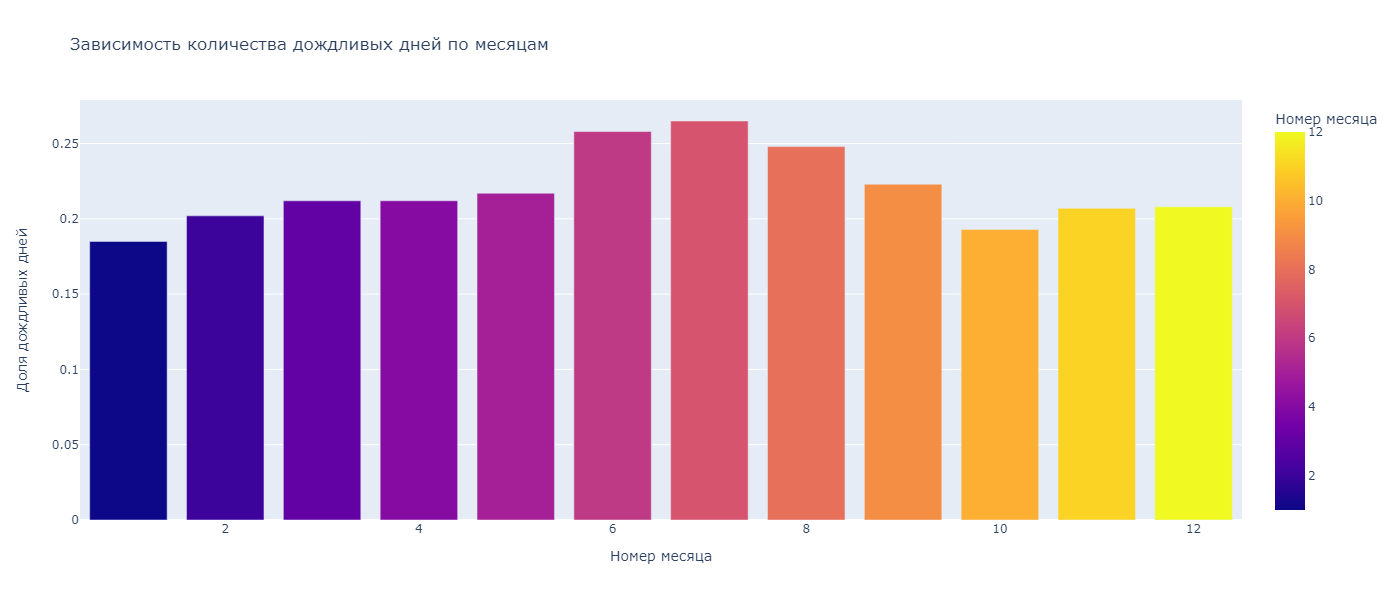

c:\Users\ilyaz\anaconda3\lib\site-packages\plotly\express\_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



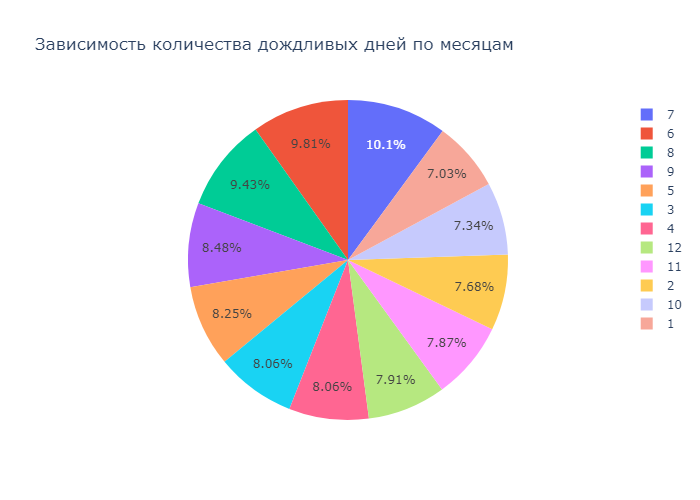

In [9]:
# Строим таблицу зависимости количества дождливых дней по месяцам
month_rain_grouped = weather_df.groupby(by = 'Month')[['RainToday']].mean().round(3).sort_values(by='RainToday', ascending=False)



# Строим столбчатую диаграмму
fig = px.bar(
    data_frame = month_rain_grouped,                            # DataFrame
    x = month_rain_grouped.index,                               # распределение по оси x
    y = 'RainToday',                                            # распределение по оси y
    color = month_rain_grouped.index,                           # цвет столбцов
    orientation = 'v',                                          # ориентация относительно оси ординат
    height = 600,                                               # высота
    width = 1400,                                               # ширина
    
    labels = {
        'RainToday': 'Доля дождливых дней',                     # название оси абсцисс
        'Month': 'Номер месяца'                                 # название оси ординат
    },
    
    title = 'Зависимость количества дождливых дней по месяцам'  # название графика
)

# Выводим график
fig.show('png')




# Строим круговую диаграмму
fig = px.pie(
    data_frame = month_rain_grouped,                           # DataFrame
    values = 'RainToday',                                      # значения на графике
    names = month_rain_grouped.index,                          # названия городов
    labels = month_rain_grouped.index,                         
    title = 'Зависимость количества дождливых дней по месяцам' # название графика
)

# Выводим график
fig.show('png')

* Построим распределение осадков, минимальной температуры и максимальной температуры по месяцам

C:\Users\ilyaz\AppData\Local\Temp/ipykernel_2660/4181577413.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



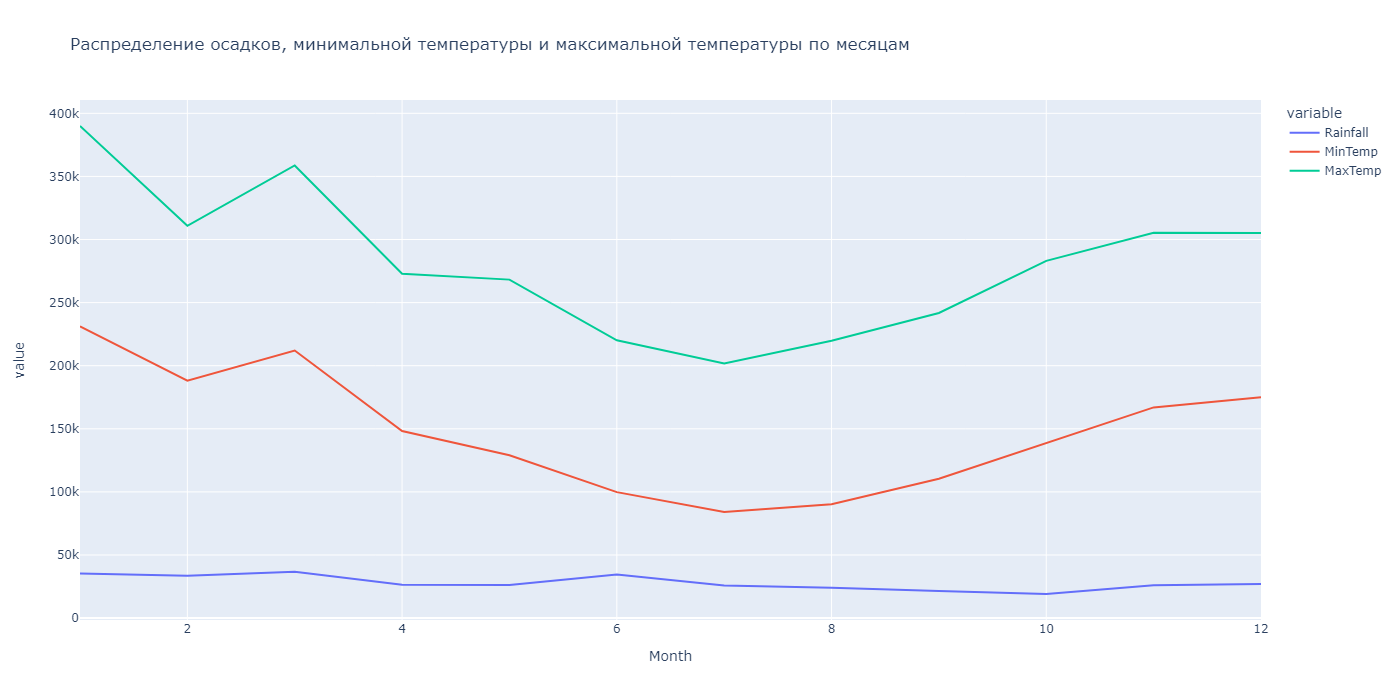

In [63]:
line_data = weather_df.groupby('Month', as_index = False).sum()

# Строим линейную диаграмму
fig = px.line(
    data_frame = line_data,
    x = 'Month',
    y = ['Rainfall', 'MinTemp', 'MaxTemp'],
    height = 700,
    width = 1400,
    title = 'Распределение осадков, минимальной температуры и максимальной температуры по месяцам'
)

# Выводим график
fig.show('png')

**Вывод:**

Из полученных графиков видно, что наибольшее количество дождливых дней приходится на Июль (`10.1%`).

#### $5.3$

Закодируем признак `Location` бинарным кодированием.

In [10]:
# Создаём экземпляр класса BinaryEncoder()
bin_encoder = ce.BinaryEncoder(cols = ['Location'])

# Кодируем признак 'Location' с помощью класса BinaryEncoder()
type_bin = bin_encoder.fit_transform(weather_df['Location'])

# Объединяем оба датасета
weather_df = pd.concat([weather_df, type_bin], axis = 1)

#### $5.4$

Закодируем оставшиеся категориальные признаки горячим кодированием.

In [ ]:
# Создаём список категориальных признаков
cat_fit_list = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'Month', 'Year']


# Создаём цикл по категориальным признакам
for column in weather_df[cat_fit_list]:
    
    # Создаём экземпляр класса OneHotEncoder()
    encoder_type = ce.OneHotEncoder(cols = [column])
    
    # Кодируем признак column с помощью класса OneHotEncoder()
    type_one_hot = encoder_type.fit_transform(weather_df[column])
    
    # Объединяем оба датасета
    weather_df = pd.concat([weather_df, type_one_hot], axis = 1)

#### $5.5$

Удаляем признаки типа *object* и *datetime64*

In [12]:
# Удаляем признаки типа object
object_columns = [features for features in weather_df.columns if weather_df[features].dtype == 'object']
weather_df.drop(object_columns, axis=1, inplace=True)

# Удаляем признак 'Date'
weather_df = weather_df.drop('Date', axis = 1)
print(f'Размер датасета после преобразования признаков: {weather_df.shape}')

Размер датасета после преобразования признаков: (145460, 94)


#### $5.6$

Разделяем данные.

In [13]:
# Разделим наш DataFrame на матрицу наблюдений X и вектор правильных ответов y
X = weather_df.drop('RainTomorrow', axis=1)
y = weather_df.RainTomorrow


# Разбиваем данные на обучающую и тестовую выборки в соотношении 70/30, 
# в качестве значения параметра random_state возьмём число 31
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=31)
print('Среднее значение целевой переменной на тестовой выборке: {:.2f}'.format(y_test.mean()))

Среднее значение целевой переменной на тестовой выборке: 0.22


#### $5.7$

С помощью **SelectKBest()** отберём 20 признаков, наилучшим образом подходящих для использования в задаче. Отбор реализуем по обучающей выборке, используя параметр $score$ $func$ = `f_classif`.

In [14]:
# Создаём селектор SelectKBest()
selector = feature_selection.SelectKBest(
    score_func = feature_selection.f_classif,
    k = 20
)

# Применяем полученный селектор к обучающей выборке
selector.fit(X_train, y_train)

# Выводим выбранные признаки
print(f'Методом SelectKBest() были выбраны следующие признаки: \n\n{selector.get_feature_names_out()}')

Методом SelectKBest() были выбраны следующие признаки: 

['MinTemp' 'MaxTemp' 'Rainfall' 'WindGustSpeed' 'WindSpeed9am'
 'WindSpeed3pm' 'Humidity9am' 'Humidity3pm' 'Pressure9am' 'Pressure3pm'
 'Cloud9am' 'Temp3pm' 'RainToday' 'Location_4' 'WindGustDir_12'
 'WindGustDir_15' 'WindDir9am_2' 'WindDir9am_3' 'WindDir9am_12'
 'WindDir9am_13']


In [15]:
# Удаляем ненужные признаки
for column in weather_df.columns:
    
    if column not in selector.get_feature_names_out():
        if column != 'RainTomorrow':
            weather_df = weather_df.drop(column, axis = 1)
        
        
# Выводим информацию о признаках
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   MinTemp         145460 non-null  float64
 1   MaxTemp         145460 non-null  float64
 2   Rainfall        145460 non-null  float64
 3   WindGustSpeed   145460 non-null  float64
 4   WindSpeed9am    145460 non-null  float64
 5   WindSpeed3pm    145460 non-null  float64
 6   Humidity9am     145460 non-null  float64
 7   Humidity3pm     145460 non-null  float64
 8   Pressure9am     145460 non-null  float64
 9   Pressure3pm     145460 non-null  float64
 10  Cloud9am        145460 non-null  float64
 11  Temp3pm         145460 non-null  float64
 12  RainToday       145460 non-null  int64  
 13  RainTomorrow    145460 non-null  int64  
 14  Location_4      145460 non-null  int64  
 15  WindGustDir_12  145460 non-null  int64  
 16  WindGustDir_15  145460 non-null  int64  
 17  WindDir9am

Построим тепловую карту корреляций признаков.

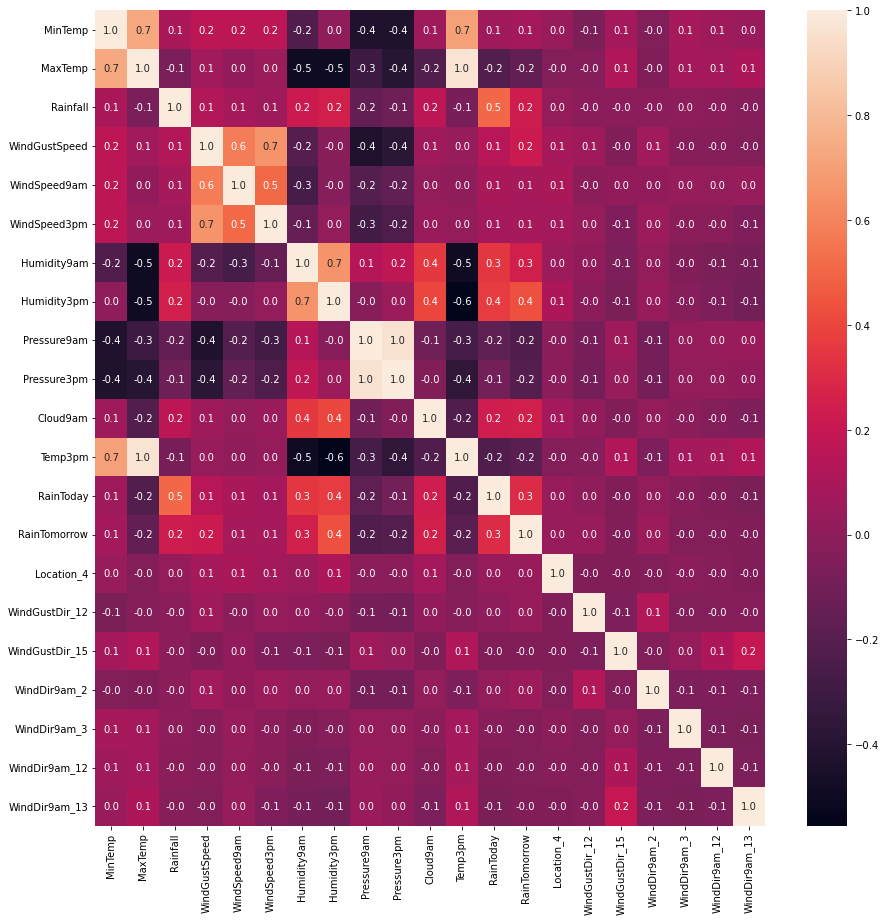

In [16]:
# Задаём размер графика
plt.rcParams['figure.figsize'] = (15, 15)


# Строим тепловую карту
sns.heatmap(
    data = weather_df.corr(),
    annot = True,
    fmt = '.1f'
);

В данных присутствуют высококоррелированные связи (+- 0.7). Удалим по одному признаку из данных пар.

In [17]:
high_corr_features = ['Temp3pm', 'Pressure3pm']

# Удаляем признаки с высокой корреляцией
for column in weather_df.columns:
    if column in high_corr_features:
        weather_df = weather_df.drop(column, axis = 1)
        

# Выводим информацию о признаках
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   MinTemp         145460 non-null  float64
 1   MaxTemp         145460 non-null  float64
 2   Rainfall        145460 non-null  float64
 3   WindGustSpeed   145460 non-null  float64
 4   WindSpeed9am    145460 non-null  float64
 5   WindSpeed3pm    145460 non-null  float64
 6   Humidity9am     145460 non-null  float64
 7   Humidity3pm     145460 non-null  float64
 8   Pressure9am     145460 non-null  float64
 9   Cloud9am        145460 non-null  float64
 10  RainToday       145460 non-null  int64  
 11  RainTomorrow    145460 non-null  int64  
 12  Location_4      145460 non-null  int64  
 13  WindGustDir_12  145460 non-null  int64  
 14  WindGustDir_15  145460 non-null  int64  
 15  WindDir9am_2    145460 non-null  int64  
 16  WindDir9am_3    145460 non-null  int64  
 17  WindDir9am

#### $5.8$

Исследуем распределение данных.

Построим график распределения признаков

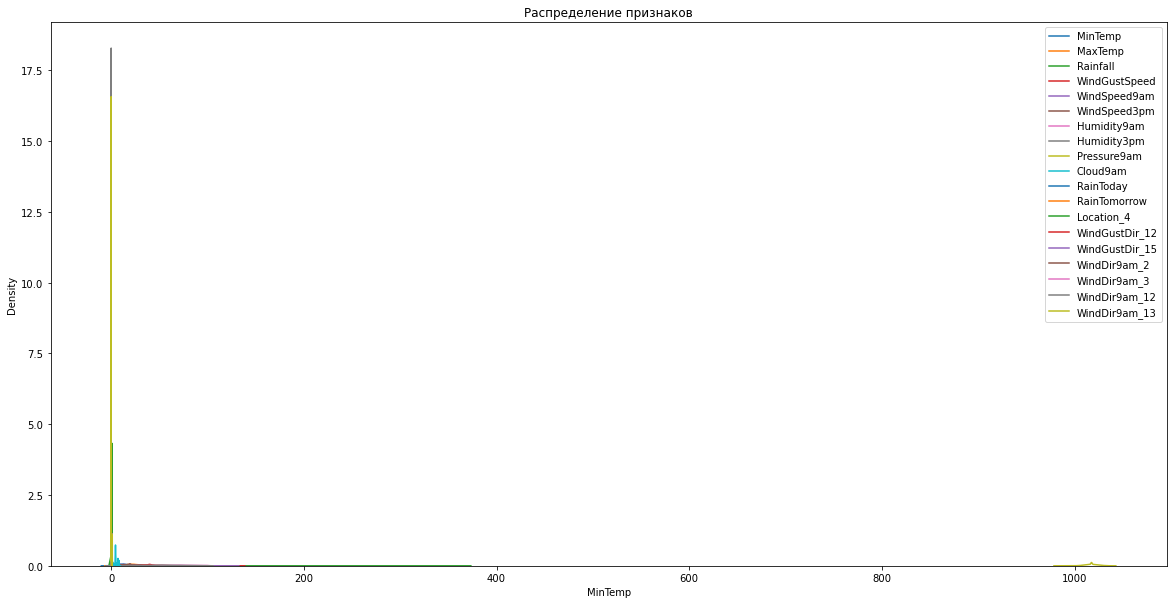

In [110]:
# Задаём параметры графика
fig, (ax) = plt.subplots(
    ncols = 1,                          # количество
    figsize = (20, 10)                  # размеры графика
)

ax.set_title('Распределение признаков') # наименование графика


# Строим график
for column in weather_df.columns:
    sns.kdeplot(weather_df[column], ax=ax, label=column)
    
# Выводим график
plt.legend()

Нормализуем данные используя *MinMax*-нормализацию.

In [18]:
# Инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# Кодируем исходный датасет
weather_mm = mm_scaler.fit_transform(weather_df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
weather_mm = pd.DataFrame(weather_mm, columns = list(weather_df.columns))

Визуализируем данные

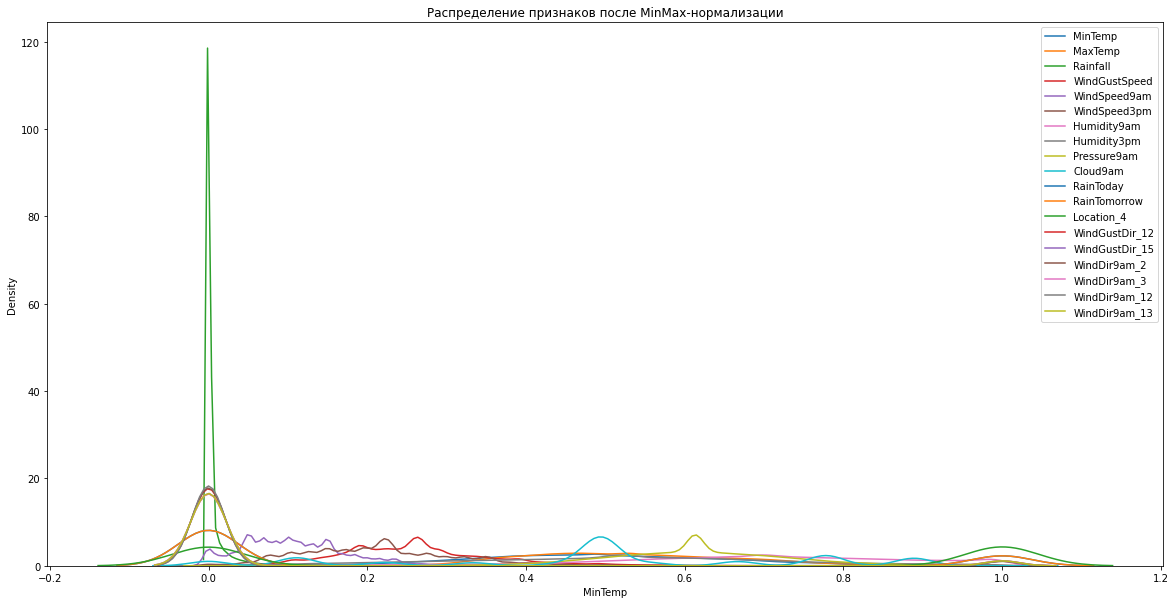

In [112]:
# Задаём параметры графика
fig, (ax) = plt.subplots(
    ncols = 1,            # количество графиков
    figsize = (20, 10)    # размеры шрафика
)

ax.set_title('Распределение признаков после MinMax-нормализации')  # наименование графика



# Строим график
for column in weather_mm.columns:
    sns.kdeplot(weather_mm[column], ax=ax, label=column)
    
# Выводим график
plt.legend()

#### $5.9$

Разделим данные обновлённого датасета.

In [19]:
# Разделим наш DataFrame на матрицу наблюдений X и вектор правильных ответов y
X = weather_mm.drop('RainTomorrow', axis = 1)
y = weather_mm.RainTomorrow


# Разбиваем данные на обучающую и тестовую выборки в соотношении 70/30, 
# в качестве значения параметра random_state возьмём число 31
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=31)

Рассчитаем среднее арифметическое для первого предиктора из тренировочной и тестовой выборки.

In [20]:
print('Среднее арифметическое первого предиктора тренировочного набора данных: {:.2f}'.format(X_train.RainToday.mean()))
print('Среднее арифметическое первого предиктора тестового набора данных: {:.2f}'.format(X_test.RainToday.mean()))

Среднее арифметическое первого предиктора тренировочного набора данных: 0.22
Среднее арифметическое первого предиктора тестового набора данных: 0.22


## <center> **`6.` Построение и сравнение моделей (Machine Learning)**

#### $6.1$

Сделаем оценку стандартного отклонения для среднего значения минимальной температуры для обучающей выборки (то есть для среднего значения по признаку `MinTemp`). 

Для этого сгенерируем 1000 случайных выборок из наших данных.

In [21]:
def gbs(data, n):
    
    inds = np.random.randint(0, len(data), (n, len(data)))   # определяем индексы случайным образом
    numbers = data[inds]                                     # выбираем значения по индексам
    
    return numbers


target = X_train.MinTemp.values                                                    # выбираем целевую переменную
np.random.seed(31)                                                                 # задаём параметр генератора случайных чисел
mean_values = [np.mean(x) for x in gbs(target, 1000)]                              # получаем все средние значения
print('Стандартное отклонение значений: {:.2f}'.format(np.std(mean_values)))

Стандартное отклонение значений: 0.00


#### $6.2$

Построим простейшую логистическую регрессию (без настройки гиперпараметров). Это будет та модель, с качеством которой мы будем сравнивать результаты, полученные далее.

В качестве ответа выведем значение метрики `roc_auc` на тестовой выборке. Ответ округлим до двух знаков после точки-разделителя.

In [19]:
# Создаём модель класса LogisticRegression()
LR_model = linear_model.LogisticRegression()

# Обучаем модель на обучающей выборке
LR_model.fit(X_train, y_train)

# Делаем предсказание на обеих выборках
lr_y_train_predict = LR_model.predict(X_train)
lr_y_test_predict = LR_model.predict(X_test)

# Выводим отчёт о метриках
print(metrics.classification_report(y_test, lr_y_test_predict))

# Выводим значения метрики roc_auc для обеих выборок
print('Значение метрики roc_auc на тренировочной выборке: {:.2f}'.format(metrics.roc_auc_score(y_train, lr_y_train_predict)))
print('Значение метрики roc_auc на тестовой выборке: {:.2f}'.format(metrics.roc_auc_score(y_test, lr_y_test_predict)))

              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90     33942
         1.0       0.71      0.45      0.55      9696

    accuracy                           0.84     43638
   macro avg       0.79      0.70      0.73     43638
weighted avg       0.83      0.84      0.82     43638

Значение метрики roc_auc на тренировочной выборке: 0.70
Значение метрики roc_auc на тестовой выборке: 0.70


c:\Users\ilyaz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### $6.2$

Теперь попробуем обучить на наших данных другой алгоритм — дерево решений. С помощью **GridSearchCV** сделаем перебор гиперпараметров.

Для параметра кросс-валидации `cv` зададим значение 3. Для решающего дерева определим параметр `random_state=42`. Остальные параметры оставим по умолчанию.

In [20]:
# Задаём сетку гиперпараметров
params = {
    'max_leaf_nodes': list(range(2, 10)),
    'min_samples_split': [2, 3, 4],
    'max_depth': [5, 7, 9, 11]
}



# Инициализируем поиск на сетке и обучаем его
GS_model = model_selection.GridSearchCV(
    
    estimator = tree.DecisionTreeClassifier(random_state = 42), # модель
    param_grid = params,                                        # сетка параметров
    scoring = 'roc_auc',                                        # метрика
    cv = 3,                                                     # кросс-валидатор
    n_jobs = -1                                                 # используем все мощности процессора
     
)


# Обучаем модель
GS_model.fit(X_train, y_train)
print('Наилучшие значения гиперпараметров: {}'.format(GS_model.best_params_))

Наилучшие значения гиперпараметров: {'max_depth': 5, 'max_leaf_nodes': 9, 'min_samples_split': 2}


С помощью наилучшей модели сделаем предсказание для обучающей и тестовой выборок. Рассчитаем значение метрики `roc_auc` на каждой из выборок. Ответы **округлим до двух знаков после точки-разделителя**.

In [21]:
# Определяем наилучшую модель
best_model = GS_model.best_estimator_

# Делаем предсказание на обеих выборках
gs_y_train_pred = best_model.predict(X_train)
gs_y_test_pred = best_model.predict(X_test)

# Считаем метрику roc_auc на обучающей и тестовой выборках
print('Метрика roc_auc на обучающем наборе: {:.2f}'.format(metrics.roc_auc_score(y_train, gs_y_train_pred)))
print('Метрика roc_auc на тестовом наборе: {:.2f}'.format(metrics.roc_auc_score(y_test, gs_y_test_pred)))

Метрика roc_auc на обучающем наборе: 0.69
Метрика roc_auc на тестовом наборе: 0.69


#### $6.3$

Деревья решений не помогли нам в улучшении качества модели, так что попробуем ещё уменьшить ошибку с помощью ансамблей.

Теперь построим случайный лес, включающий 100 деревьев. Зададим параметр `random_state=31`. Остальные параметры оставим по умолчанию.

In [22]:
# Создаём объект класса RandomForestClassifier()
RFC_model = ensemble.RandomForestClassifier(
    
    n_estimators = 100,   # количество деревьев
    random_state = 31     # генератор случайных чисел
    
)


# Обучаем модель на тренировочной выборке
RFC_model.fit(X_train, y_train)

# Делаем предсказание на обоих выборках
rfc_y_train_pred = RFC_model.predict(X_train)
rfc_y_test_pred = RFC_model.predict(X_test)

# Считаем метрику roc_auc на обучающей и тестовой выборках
print('Метрика roc_auc на обучающем наборе: {:.2f}'.format(metrics.roc_auc_score(y_train, rfc_y_train_pred)))
print('Метрика roc_auc на тестовом наборе: {:.2f}'.format(metrics.roc_auc_score(y_test, rfc_y_test_pred)))

Метрика roc_auc на обучающем наборе: 1.00
Метрика roc_auc на тестовом наборе: 0.71


#### $6.4$

Зададим следующие параметры: `max_features`, `min_samples_leaf`, `max_depth`.

Возьмём случайный лес из 100 деревьев и вычислим оптимальную комбинацию из заданых параметров.

Перебор осуществим с помощью **GridSearchCV**. Для параметра кросс-валидации `cv` зададим значение 3. Случайности фиксируйте параметром `random_state = 31`. Остальные значения оставим по умолчанию.

In [23]:
# Задаём сетку гиперпараметров
param_grid = {
    'max_features': [ 4, 5, 6, 7], 
    'min_samples_leaf': [3, 5, 7, 9, 11], 
    'max_depth': [5, 10, 15]
    }



# Инициализируем поиск на сетке и обучаем его
GS_model_1 = model_selection.GridSearchCV(
    
    estimator = ensemble.RandomForestClassifier(            # модель
        n_estimators = 100,                                 # количество деревьев
        random_state = 31                                   # генератор лсучайных чисел      
    ),
    
    param_grid = param_grid,                                # сетка параметров
    scoring = 'roc_auc',                                    # метрика
    cv = 3,                                                 # кросс-валидатор
    n_jobs = -1                                             # используем все мощности процессора
    
)


# Обучаем модель
GS_model_1.fit(X_train, y_train)
print('Наилучшие значения гиперпараметров: {}'.format(GS_model_1.best_params_))

Наилучшие значения гиперпараметров: {'max_depth': 15, 'max_features': 7, 'min_samples_leaf': 9}


С помощью наилучшей модели сделаем предсказание для обучающей и тестовой выборок. Рассчитаем значение метрики `roc_auc` на каждой из выборок. Ответы **округлим до двух знаков после точки-разделителя**.

In [24]:
# Определяем наилучшую модель
best_model_1 = GS_model_1.best_estimator_

# Обучаем модель
best_model_1.fit(X_train, y_train)

# Делаем предсказание на обеих выборках
gs1_y_train_pred = best_model_1.predict(X_train)
gs1_y_test_pred = best_model_1.predict(X_test)

# Считаем метрику roc_auc на обучающей и тестовой выборках
print('Метрика roc_auc на обучающем наборе: {:.2f}'.format(metrics.roc_auc_score(y_train, gs1_y_train_pred)))
print('Метрика roc_auc на тестовом наборе: {:.2f}'.format(metrics.roc_auc_score(y_test, gs1_y_test_pred)))

Метрика roc_auc на обучающем наборе: 0.77
Метрика roc_auc на тестовом наборе: 0.71


#### $6.5$

Вычислим признаки, которые оказывают большее влияние на целевую переменную по сравнению с другими.

Таблица важности признаков: 

          features  importances
7      Humidity3pm     0.386562
2         Rainfall     0.100808
3    WindGustSpeed     0.088593
8      Pressure9am     0.088142
6      Humidity9am     0.069439
1          MaxTemp     0.057092
0          MinTemp     0.053970
10       RainToday     0.048157
5     WindSpeed3pm     0.033888
9         Cloud9am     0.032035
4     WindSpeed9am     0.027731
11      Location_4     0.007531
12  WindGustDir_12     0.002376
14    WindDir9am_2     0.001342
13  WindGustDir_15     0.000795
15    WindDir9am_3     0.000643
17   WindDir9am_13     0.000476
16   WindDir9am_12     0.000419


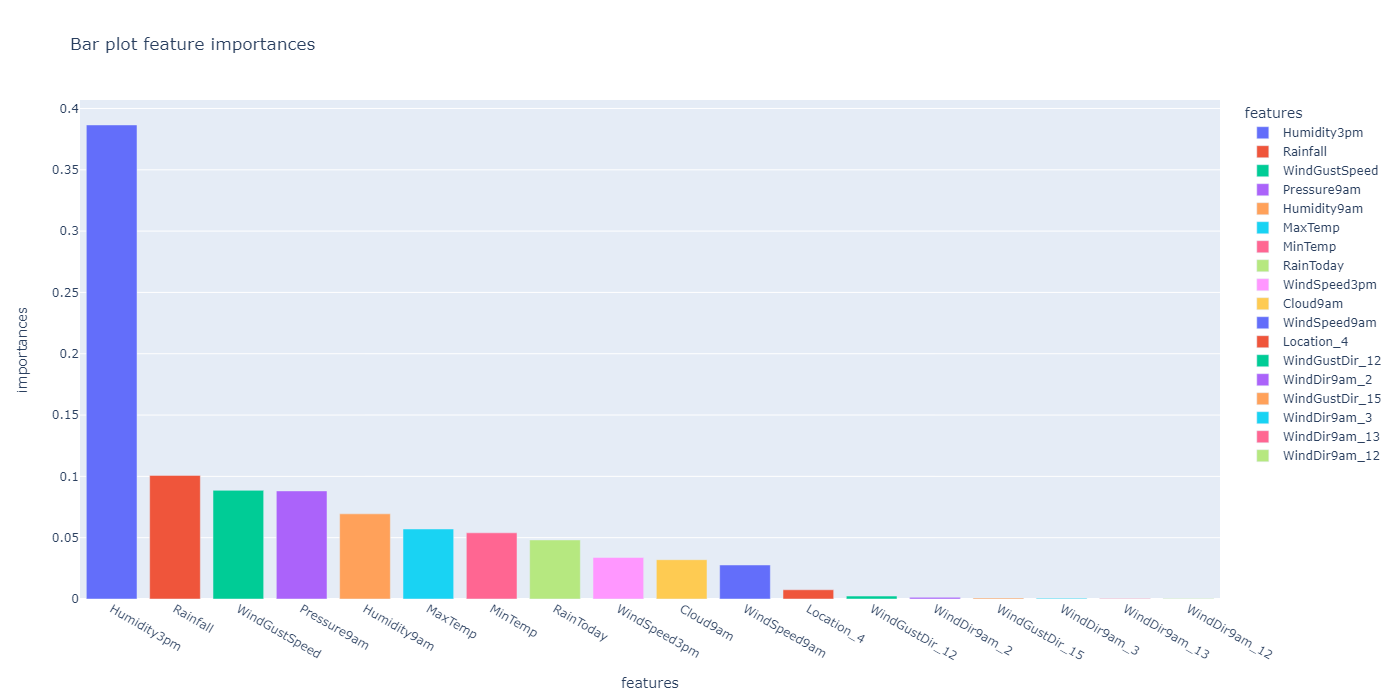

In [125]:
# Выделяем наиболее важные признаки
features = X.columns                                     # признаки
feature_importances = best_model_1.feature_importances_  # важность признаков



# Создаём DataFrame, содержащий информацию о важности признаков
importances_data = pd.DataFrame({
    'features': features,                # признаки 
    'importances': feature_importances   # шкала важности признаков 
})

# Сортируем признаки по их важности
importances_data = importances_data.sort_values(by='importances', ascending=False)

# Выводим таблицу
print(f'Таблица важности признаков: \n\n{importances_data}')




# Строим столбчатую диаграмму
fig = px.bar(
    data_frame = importances_data,            # DataFrame
    x = 'features',                             # распределение по оси x
    y = 'importances',                        # распределение по оси y
    color = 'features',                         # цвет графика 
    orientation = 'v',                        # вертиуальная ориентация графика
    height = 700,                             # высота
    width = 1400,                             # ширина
    
    labels = {                                # название осей
        'x': 'Features',
        'y': 'Importance'
    },
    
    title = 'Bar plot feature importances'    # название графика
)

fig.show('png')

## <center> **Вывод**

По окончании обработки данных, построения и тестирования различных моделей наилучший результат показала модель случайного леса (значение метрики **f1_score** на обучающем и тестовом наборе равны: `0.77` и `0.71` соответственно). Таким образом, процент ошибки нашей модели составляет `29%`.